# Ex. 1

In [1]:
library(mlbench)
data(Glass)
#data structure and missing values
str(Glass)

'data.frame':	214 obs. of  10 variables:
 $ RI  : num  1.52 1.52 1.52 1.52 1.52 ...
 $ Na  : num  13.6 13.9 13.5 13.2 13.3 ...
 $ Mg  : num  4.49 3.6 3.55 3.69 3.62 3.61 3.6 3.61 3.58 3.6 ...
 $ Al  : num  1.1 1.36 1.54 1.29 1.24 1.62 1.14 1.05 1.37 1.36 ...
 $ Si  : num  71.8 72.7 73 72.6 73.1 ...
 $ K   : num  0.06 0.48 0.39 0.57 0.55 0.64 0.58 0.57 0.56 0.57 ...
 $ Ca  : num  8.75 7.83 7.78 8.22 8.07 8.07 8.17 8.24 8.3 8.4 ...
 $ Ba  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Fe  : num  0 0 0 0 0 0.26 0 0 0 0.11 ...
 $ Type: Factor w/ 6 levels "1","2","3","5",..: 1 1 1 1 1 1 1 1 1 1 ...


>(a) Using visualizations, explore the predictor variables to understand their distributions as well as the relationships between predictors

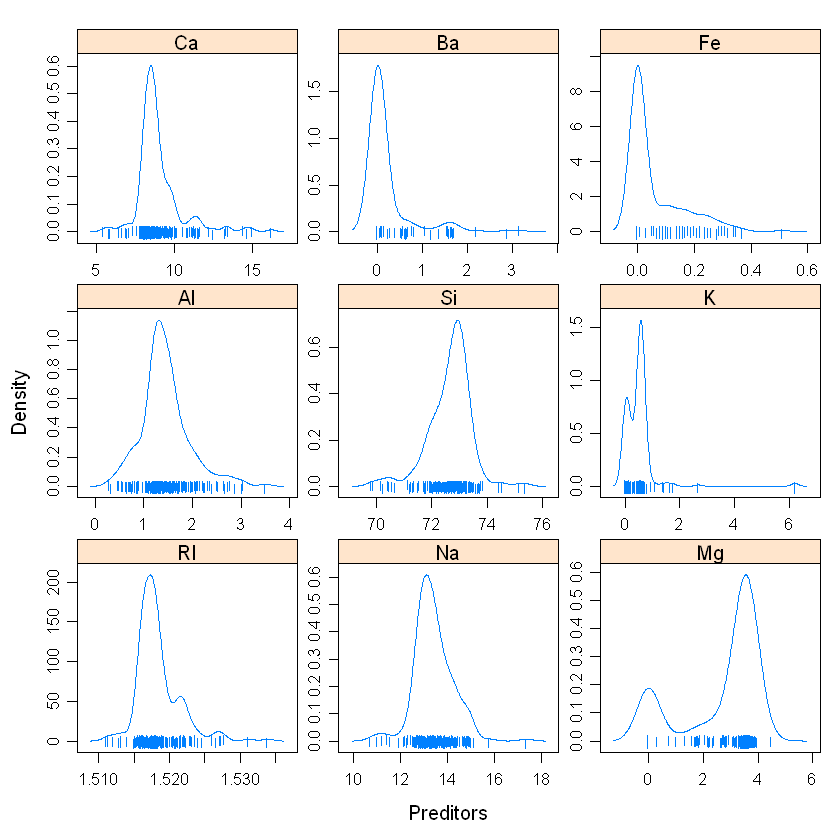

In [2]:
#distribution
library(reshape)
meltedGlass <- melt(Glass,id.vars="Type")

library(lattice)
densityplot(~value|variable,data=meltedGlass,
            scales = list(x=list(relation="free"),y=list(relation = "free")),
           adjust=1.25,pch="|",xlab="Preditors")

> (b) Does there appear to be any outliers in the data? Are predictors skewed

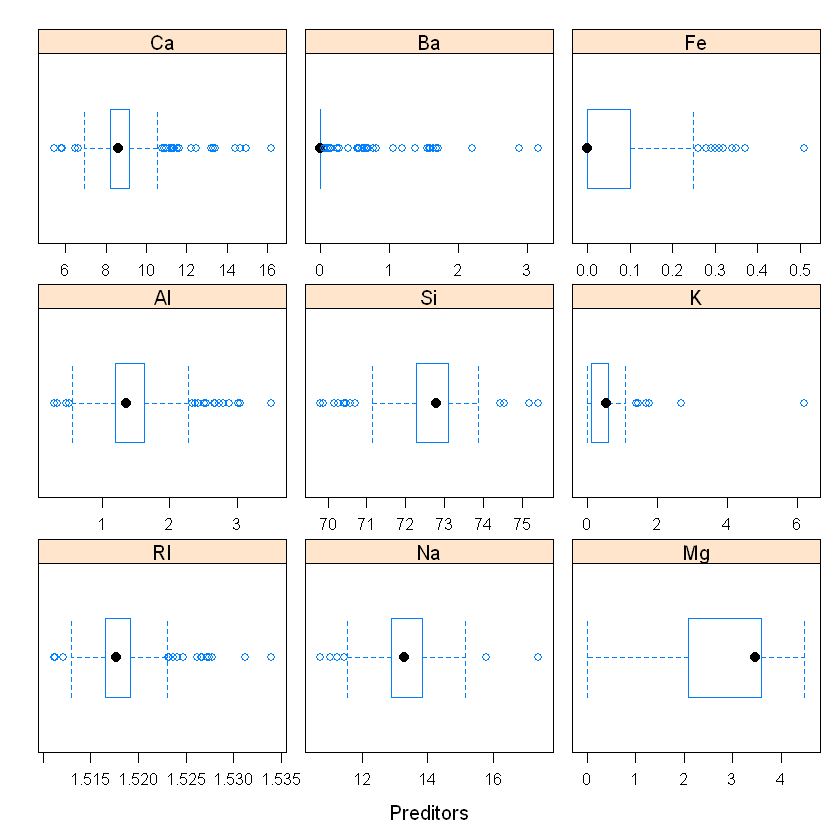

In [3]:
#outliners
bwplot(~value|variable,data=meltedGlass,
            scales = list(x=list(relation="free"),y=list(relation = "free")),
           xlab="Preditors")

Warning message:
"package 'ggcorrplot' was built under R version 3.5.1"Loading required package: ggplot2


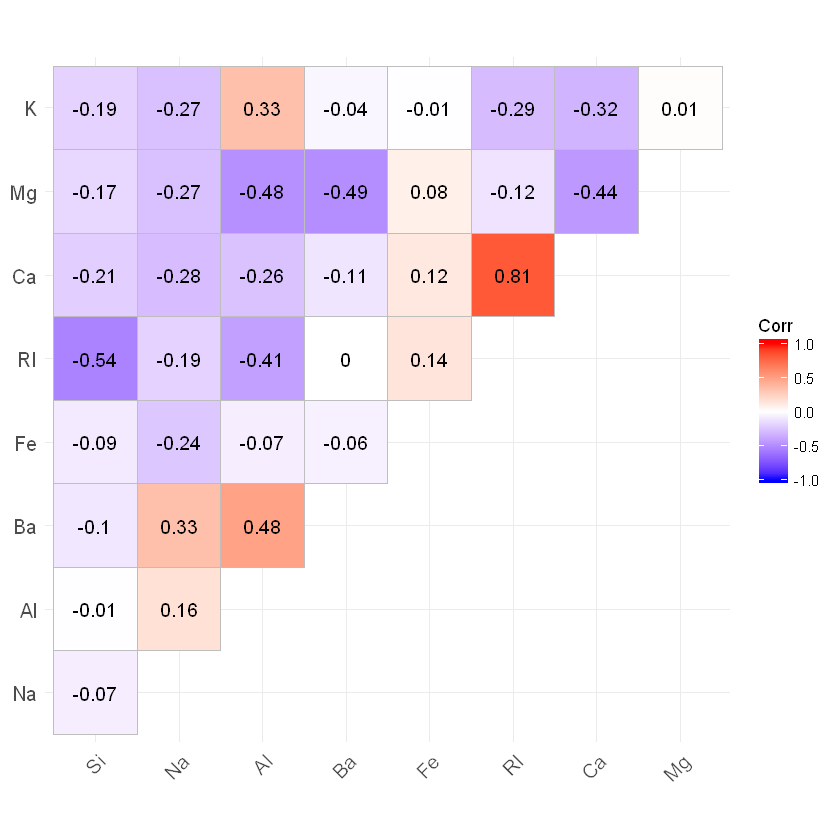

In [4]:
#cor
library(ggcorrplot)
ggcorrplot(round(cor(Glass[,1:9]),2), hc.order = TRUE, type = "upper", lab = TRUE)

Loading required package: carData


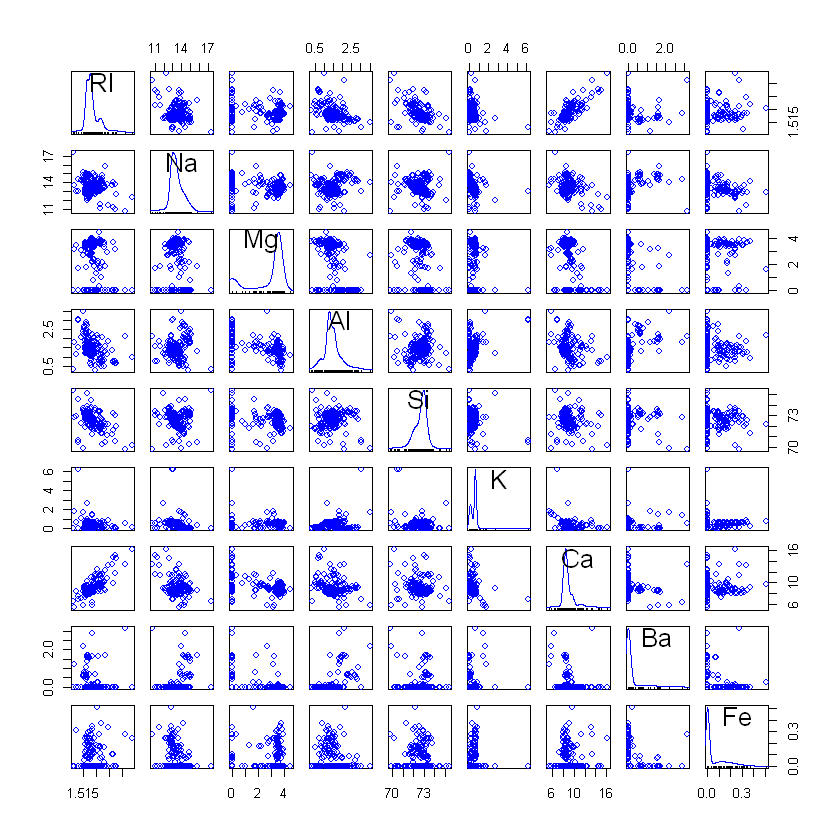

In [5]:
library(car)
spm(Glass[,1:9],smooth=F,regLine = F)

>(c) Are there any relevant transformations of one or more predictors that might improve the
classification model?

In [6]:
#For skewness, first note that several predictors have values of zer
library(caret)
trans_yj <- preProcess(Glass[,-10],method="YeoJohnson")
glass_yj <- predict(trans_yj,newdata = Glass[,-10])
glass_mlt <- melt(glass_yj)

Using  as id variables


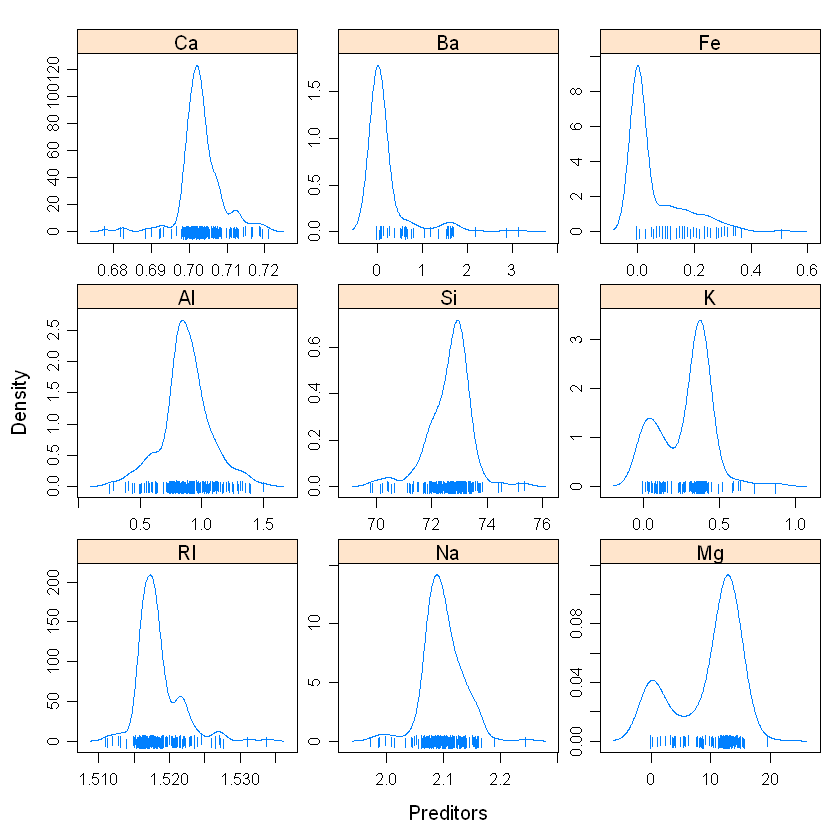

In [7]:
densityplot(~value|variable,data=glass_mlt,
            scales = list(x=list(relation="free"),y=list(relation = "free")),
           adjust=1.25,pch="|",xlab="Preditors")

In [8]:
trans_scaling <- preProcess(Glass[,-10],method = c("center","scale"))
glass_scaling <- predict(trans_scaling,newdata = Glass[,-10])
glass_spatial <- spatialSign(glass_scaling)
#https://github.com/topepo/caret/blob/master/pkg/caret/R/spatialSign.R
#https://stackoverflow.com/questions/28194655/r-is-spatialsign-function-useful-for-identifying-outliers

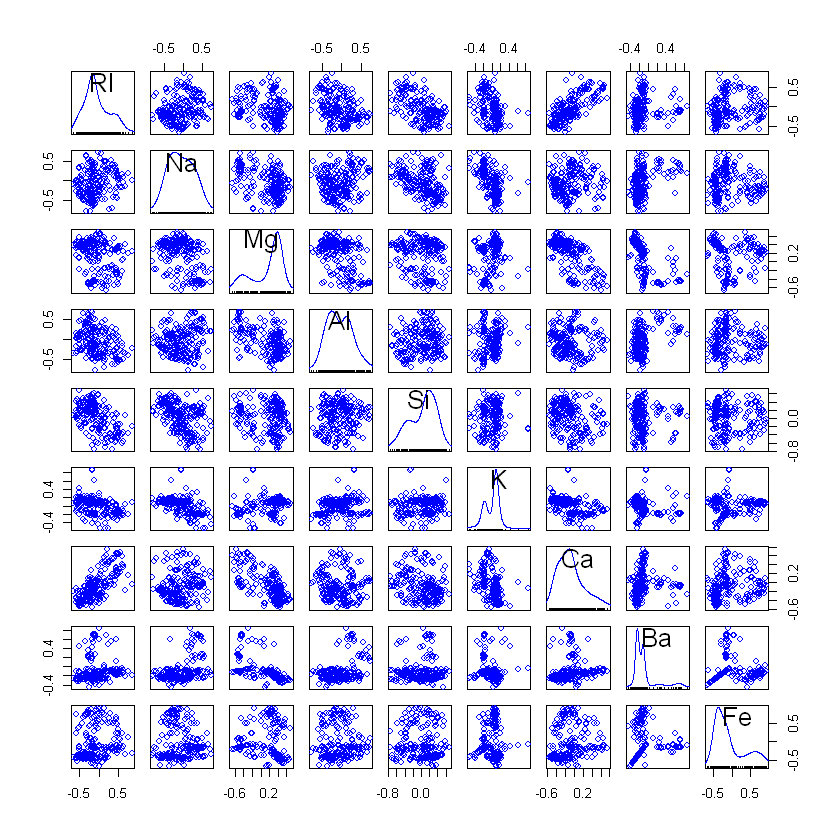

In [10]:
#splom(~glass_spatial,pch=16,col=rgb(.2,.2,.2,.4),cex=.5)

# df_mlt <- melt(data.frame(glass_spatial))
# densityplot(~value|variable,data=df_mlt,
#             scales = list(x=list(relation="free"),y=list(relation = "free")),
#            adjust=1.25,pch="|",xlab="Preditors")

spm(glass_spatial,smooth=F,regLine = F)

# Ex. 2
>(a) Investigate the frequency distributions for the categorical predictors. Are the distributions
likely to cause issues for models.

In [189]:
library(mlbench)
data(Soybean)
str(Soybean)

'data.frame':	683 obs. of  36 variables:
 $ Class          : Factor w/ 19 levels "2-4-d-injury",..: 11 11 11 11 11 11 11 11 11 11 ...
 $ date           : Factor w/ 7 levels "0","1","2","3",..: 7 5 4 4 7 6 6 5 7 5 ...
 $ plant.stand    : Ord.factor w/ 2 levels "0"<"1": 1 1 1 1 1 1 1 1 1 1 ...
 $ precip         : Ord.factor w/ 3 levels "0"<"1"<"2": 3 3 3 3 3 3 3 3 3 3 ...
 $ temp           : Ord.factor w/ 3 levels "0"<"1"<"2": 2 2 2 2 2 2 2 2 2 2 ...
 $ hail           : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 2 1 1 ...
 $ crop.hist      : Factor w/ 4 levels "0","1","2","3": 2 3 2 2 3 4 3 2 4 3 ...
 $ area.dam       : Factor w/ 4 levels "0","1","2","3": 2 1 1 1 1 1 1 1 1 1 ...
 $ sever          : Factor w/ 3 levels "0","1","2": 2 3 3 3 2 2 2 2 2 3 ...
 $ seed.tmt       : Factor w/ 3 levels "0","1","2": 1 2 2 1 1 1 2 1 2 1 ...
 $ germ           : Ord.factor w/ 3 levels "0"<"1"<"2": 1 2 3 2 3 2 1 3 2 3 ...
 $ plant.growth   : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ leaves  

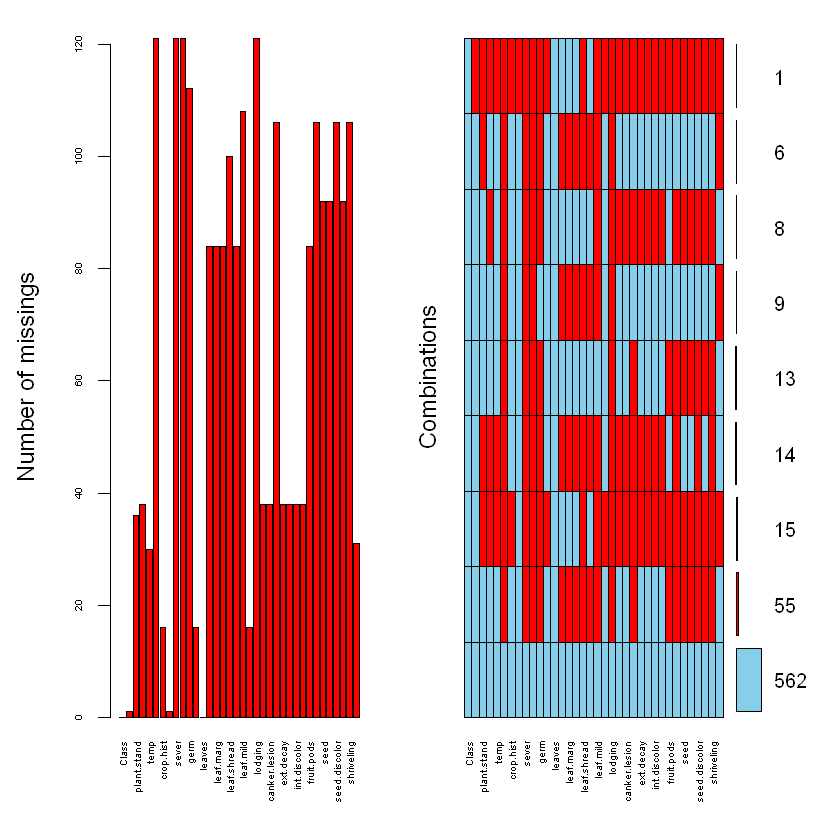

In [190]:
library(VIM)
aggr(Soybean, cex.axis=.5,prop=F,number=T)

In [191]:
table(Soybean$temp,useNA = "always")
#or we could recode using car
df <- Soybean
library(car)
df$temp <- recode(df$temp,
                 "0 = 'low'; 1 = 'norm'; 2 = 'high'; NA = 'missing'",
                 levels = c("low", "norm", "high", "missing"))
table(df$temp)


   0    1    2 <NA> 
  80  374  199   30 


    low    norm    high missing 
     80     374     199      30 

In [192]:
table(Soybean$date,useNA = "always")
df$date <- recode(df$date,
                         "0 ='apr';1='may';2='june';3='july';4='aug';5='sept';6='oct';NA = 'missing'",
                         levels = c("apr", "may", "june", "july", "aug", "sept", "missing"))
table(df$date)


   0    1    2    3    4    5    6 <NA> 
  26   75   93  118  131  149   90    1 


    apr     may    june    july     aug    sept missing 
     26      75      93     118     131     149       1 

In [193]:
table(Soybean$precip, useNA = "always")

df$precip <- recode(df$precip,
"0 = 'low'; 1 = 'norm'; 2 = 'high'; NA = 'missing'",
levels = c("low", "norm", "high", "missing"))
table(df$precip)


   0    1    2 <NA> 
  74  112  459   38 


    low    norm    high missing 
     74     112     459      38 

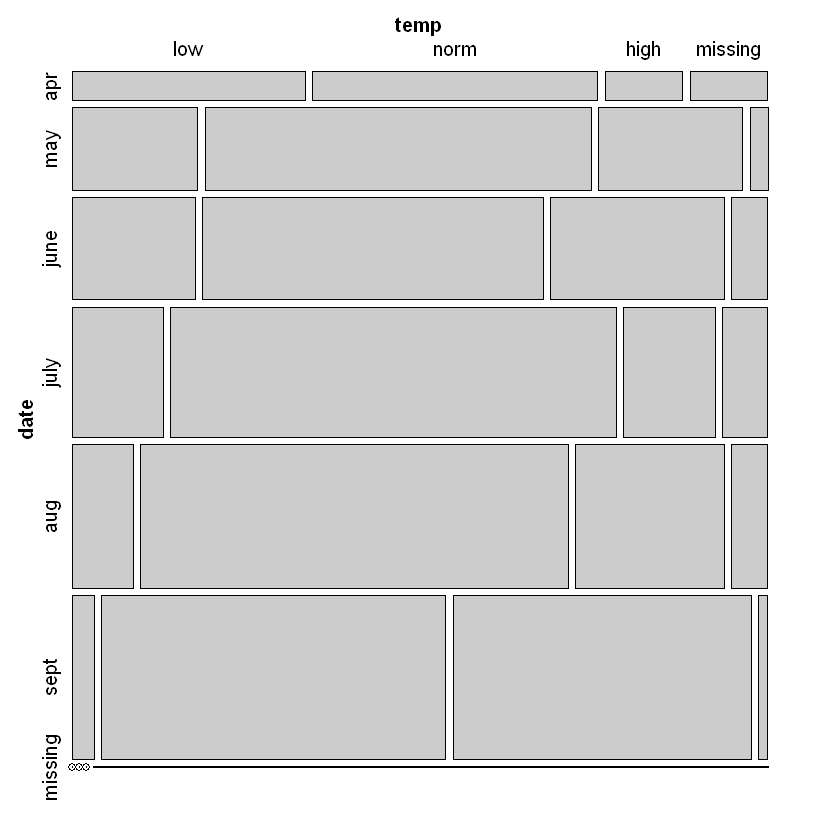

In [194]:
library(vcd)
mosaic(~date+temp,data=df)

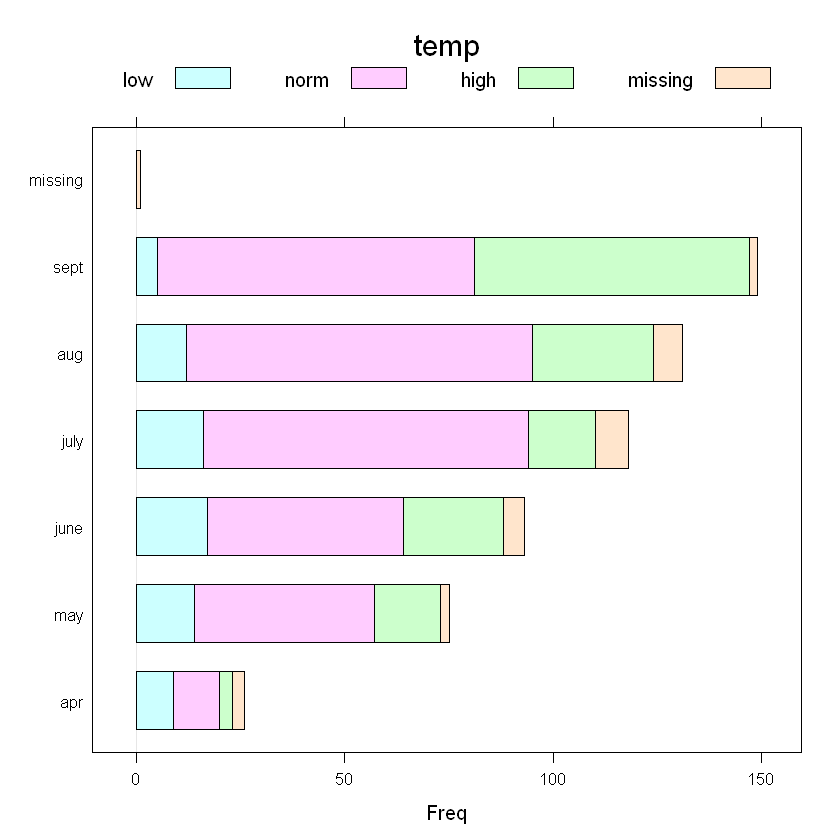

In [195]:
library(lattice)
barchart(table(df$date,df$temp),auto.key=list(columns=4,title="temp"))

In [196]:
table(Soybean$Class,complete.cases(Soybean))

                             
                              FALSE TRUE
  2-4-d-injury                   16    0
  alternarialeaf-spot             0   91
  anthracnose                     0   44
  bacterial-blight                0   20
  bacterial-pustule               0   20
  brown-spot                      0   92
  brown-stem-rot                  0   44
  charcoal-rot                    0   20
  cyst-nematode                  14    0
  diaporthe-pod-&-stem-blight    15    0
  diaporthe-stem-canker           0   20
  downy-mildew                    0   20
  frog-eye-leaf-spot              0   91
  herbicide-injury                8    0
  phyllosticta-leaf-spot          0   20
  phytophthora-rot               68   20
  powdery-mildew                  0   20
  purple-seed-stain               0   20
  rhizoctonia-root-rot            0   20

In [197]:
hasMissing <- unlist(lapply(Soybean,function(x) any(is.na(x))))
hasMissing<- names(hasMissing)[hasMissing]
head(hasMissing)

[1] "date"        "plant.stand" "precip"      "temp"        "hail"       
[6] "crop.hist"

>(b) Roughly 18% of the data are missing. Are there particular predictors that are more likely
to be missing? Is the pattern of missing data related to the classes?

In [198]:
byPredByClass <- apply(Soybean[, hasMissing], 2,
                       function(x, y) {
                           tab <- table(is.na(x), y)
                           tab[2,]/apply(tab, 2, sum)
                       },
                       y = Soybean$Class)

byPredByClass <- byPredByClass[apply(byPredByClass, 1, sum) > 0,]
byPredByClass <- byPredByClass[, apply(byPredByClass, 2, sum) > 0]
t(byPredByClass)

,2-4-d-injury,cyst-nematode,diaporthe-pod-&-stem-blight,herbicide-injury,phytophthora-rot
date,0.0625,0,0.0,0,0.0000000
plant.stand,1.0000,1,0.4,0,0.0000000
precip,1.0000,1,0.0,1,0.0000000
temp,1.0000,1,0.0,0,0.0000000
hail,1.0000,1,1.0,1,0.7727273
crop.hist,1.0000,0,0.0,0,0.0000000
area.dam,0.0625,0,0.0,0,0.0000000
sever,1.0000,1,1.0,1,0.7727273
seed.tmt,1.0000,1,1.0,1,0.7727273
germ,1.0000,1,0.4,1,0.7727273


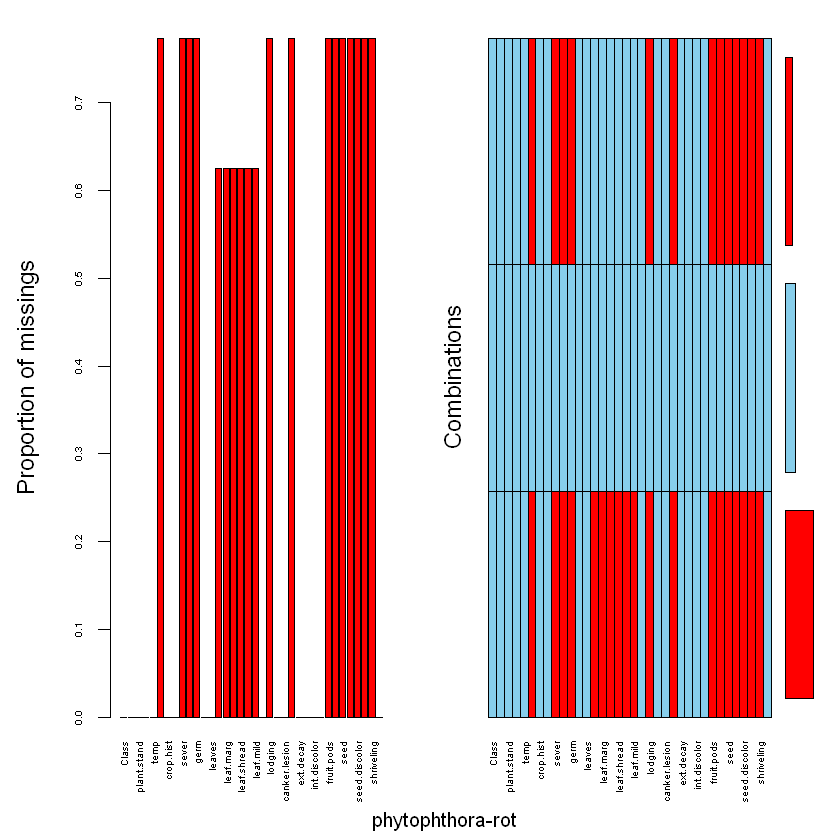

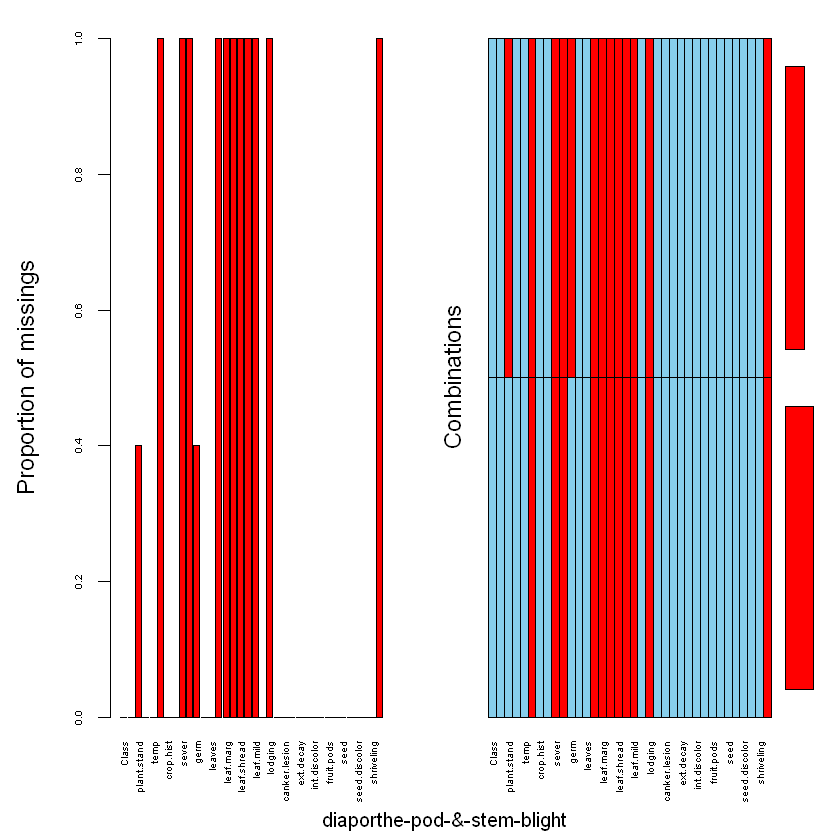

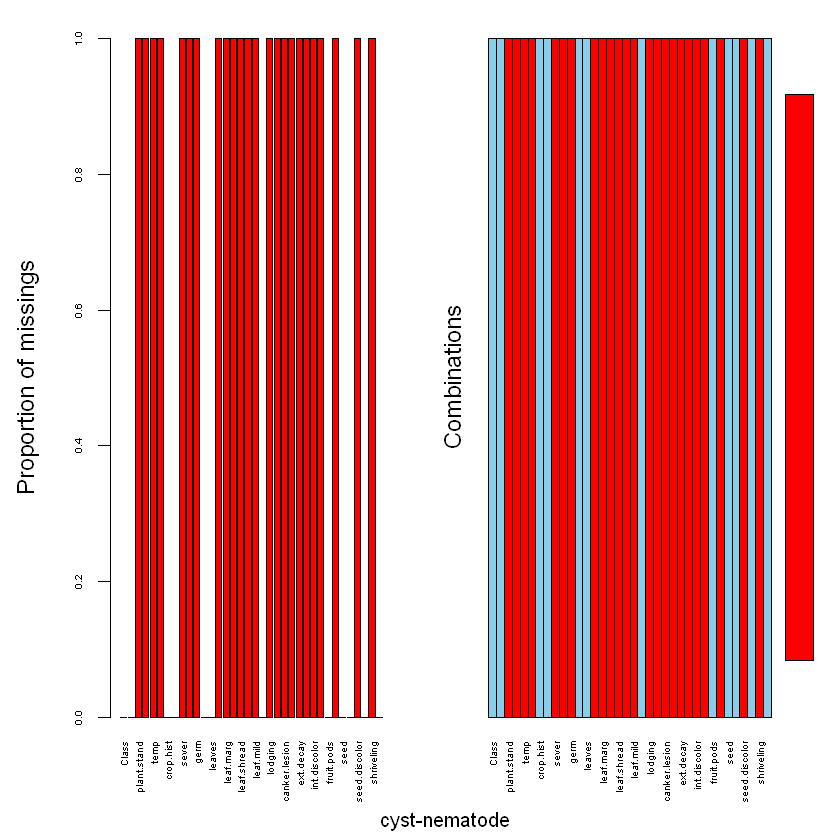

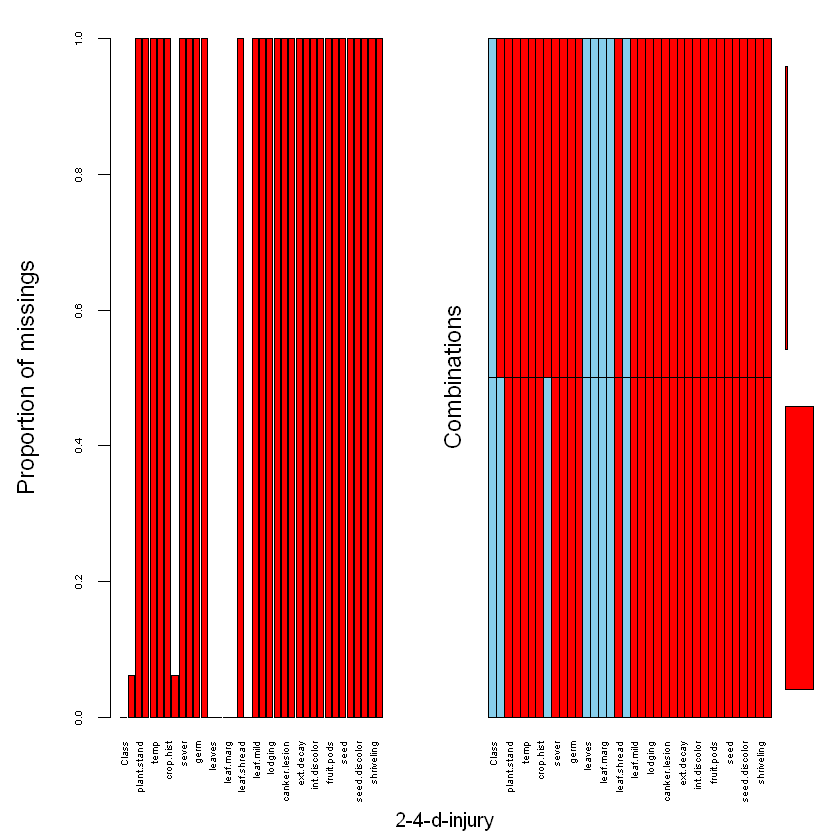

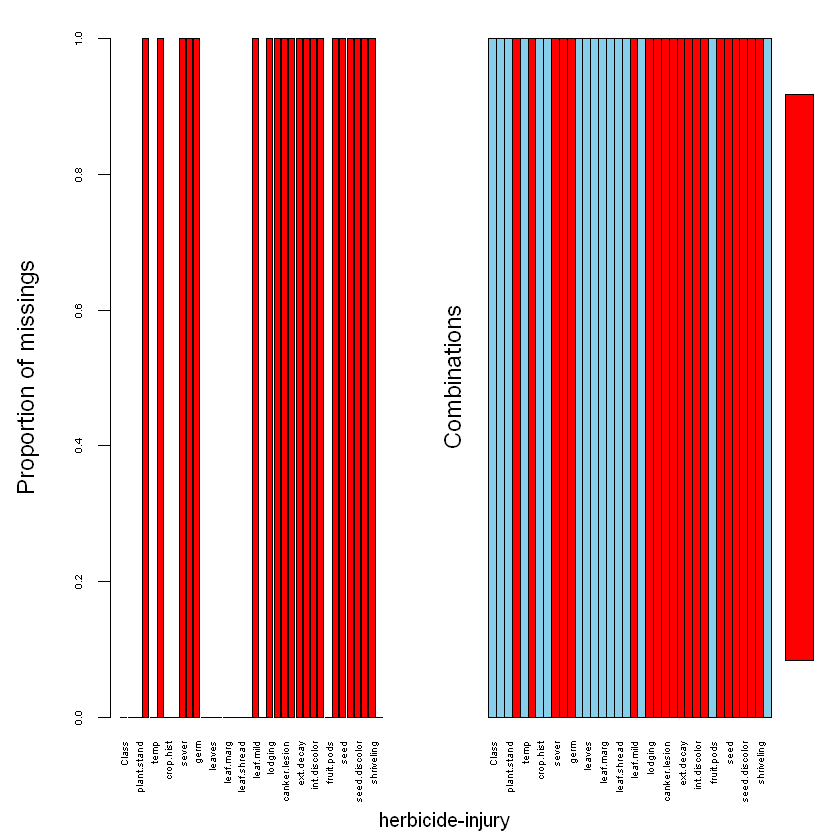

In [207]:
list <-which(rowSums(is.na(Soybean)) > 0) 
Soybean_NA <- Soybean[list,]
cols <- unique(Soybean_NA$Class)
for (i in cols){
   aggr(Soybean[Soybean$Class==i,],cex.axis=.5)
    title(sub=i)
}

>(c) Develop a strategy for dealing with the missing data, either by eliminating predictors or
imputation

In [200]:
orderedVars <- unlist(lapply(Soybean,is.ordered))
orderedVars <- names(orderedVars[orderedVars])

In [201]:
#bypass problem of missing data by removing  offending  classes
completeClasses <- as.character(unique(Soybean$Class[complete.cases(Soybean)]))
df <- subset(Soybean,Class %in% completeClasses)
for (i in orderedVars) df[,i] <- factor(as.character(df[,i]))

In [202]:
## Use dummyVars to generate the binary predictors
library(caret)
dummyInfo <- dummyVars(Class ~.,data=df)
dummies <- predict(dummyInfo,df)

Warning message in model.frame.default(Terms, newdata, na.action = na.action, xlev = object$lvls):
"variable 'Class' is not a factor"

In [203]:
predDistInfo <- nearZeroVar(dummies,saveMetrics = T)
head(predDistInfo)

,freqRatio,percentUnique,zeroVar,nzv
date.0,30.500000,0.3174603,FALSE,TRUE
date.1,8.264706,0.3174603,FALSE,FALSE
date.2,6.325581,0.3174603,FALSE,FALSE
date.3,4.727273,0.3174603,FALSE,FALSE
date.4,4.080645,0.3174603,FALSE,FALSE
date.5,3.500000,0.3174603,FALSE,FALSE


In [204]:
sum(predDistInfo$nzv)
mean(predDistInfo$nzv)
#http://stefvanbuuren.github.io/mice/

[1] 16

[1] 0.1616162

In [205]:
?title